<a href="https://colab.research.google.com/github/saadmarwan16/Tensorflow/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print('x_train.shape:', x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [7]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [10]:
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


In [13]:
i = Input(shape=x_train[0].shape, )
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15,)

Epoch 1/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5278 - accuracy: 0.8044 - val_loss: 0.4234 - val_accuracy: 0.8389
Epoch 2/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3696 - accuracy: 0.8612 - val_loss: 0.3518 - val_accuracy: 0.8667
Epoch 3/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3223 - accuracy: 0.8775 - val_loss: 0.3519 - val_accuracy: 0.8702
Epoch 4/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2887 - accuracy: 0.8906 - val_loss: 0.3132 - val_accuracy: 0.8852
Epoch 5/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2628 - accuracy: 0.8996 - val_loss: 0.3098 - val_accuracy: 0.8858
Epoch 6/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2405 - accuracy: 0.9082 - val_loss: 0.3040 - val_accuracy: 0.8893
Epoch 7/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2204 - accuracy: 0.9170 - val_loss: 0.2989 -

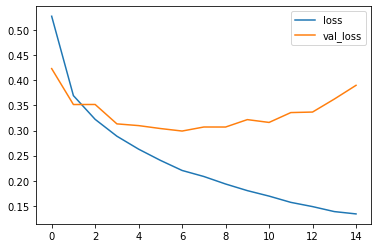

In [16]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

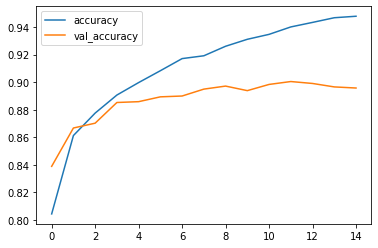

In [18]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();